In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [404]:
df = pd.read_csv("cuentas_credicel.csv", encoding="latin")
df.head(5)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_6296/2474774851.py:1: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cuentas_credicel.csv", encoding="latin")


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,74,NaN,NaN
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,0.0,0.0,0.0,NaN,NaN,74,NaN,NaN,NaN,NaN


In [405]:
df.isnull().sum()[df.isnull().sum() > 0]

empresa                  13
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          4197
puntos                 3595
riesgo                 2473
porc_enganche          2473
razones_buro           4505
semana_actual          4505
codigo_postal           685
Unnamed: 33           21876
Unnamed: 34           21532
Unnamed: 35           20262
Unnamed: 36           22734
dtype: int64

In [406]:
#Todas las columnas de fecha (datetime): Reemplazar nulos con el string: "01/01/2030 00:00"
df["fecha_ultimo_pago"] =df["fecha_ultimo_pago"].fillna("01/01/2030 00:00")
df["fecha_pago_proximo"] =df["fecha_pago_proximo"].fillna("01/01/2030 00:00")


In [407]:
df.isnull().sum()[df.isnull().sum() > 0]

empresa             13
status_cuenta     4197
puntos            3595
riesgo            2473
porc_enganche     2473
razones_buro      4505
semana_actual     4505
codigo_postal      685
Unnamed: 33      21876
Unnamed: 34      21532
Unnamed: 35      20262
Unnamed: 36      22734
dtype: int64

In [408]:
#Todas las columnas tipo string (object): Reemplazar nulos con el string: "Sin registro"
df["empresa"] =df["empresa"].fillna("Sin registro")
df["status_cuenta"] =df["status_cuenta"].fillna("Sin registro")


In [409]:
df.isnull().sum()[df.isnull().sum() > 0]

puntos            3595
riesgo            2473
porc_enganche     2473
razones_buro      4505
semana_actual     4505
codigo_postal      685
Unnamed: 33      21876
Unnamed: 34      21532
Unnamed: 35      20262
Unnamed: 36      22734
dtype: int64

In [410]:
print(df["codigo_postal"].unique())

['0' nan '74' ... '42035' '97863' '13280']


In [411]:
print(df["Unnamed: 34"].unique())

[nan '74' '73' '72' '71' '70' '69' '68' '67' '13' '66' '65' '64' '63' '62'
 '61' '60' '59' '58' '57' '72490' '56' '55' '54' '53' '52' '51' '50' '49'
 '37' '48' '47' '46' '45' '44' '43' '42' '41' '40' '39' '38' '26' '36'
 '35' '97970' '97370' '73300' '97380' '72570' '24734' '24730' '77890'
 '97690' '72710' '97945' '97630' '34' '92101' '72960' '97700' '97960'
 '76830' '91017' '92123' '73170' '92127' '40905' '93180' '97757' '39123'
 '72480' '72170' '97944' '86930' '73220' '73080' '97721' '97930' '40933'
 '33' '73310' '73000' '40880' '97566' '72450' '32' '97615' '40909' '70760'
 '72020' '97500' '93680' '74110' '24705' '93280' '24920' '93559' '31'
 '72307' '72080' '91020' '73168' '74350' '11280' '91015' '93276' '40930'
 '90970' '97773' '72227' '93260' '91713' '90491' '73886' '40897' '75857'
 '72091' '29' '72100' '93150' '72103' '72680' '86981' '93535' '97610'
 '41407' '72070' '72390' '42970' '94060' '72230' '92770' '93821' '83106'
 '73950' '72595' '93410' '24155' '90110' '72310' '91480' '74

In [412]:
df["Unnamed: 35"] = pd.to_numeric(df["Unnamed: 33"], errors="coerce").fillna(0)

In [413]:
df["Unnamed: 36"] = pd.to_numeric(df["Unnamed: 33"], errors="coerce").fillna(0)

In [414]:
df["Unnamed: 34"] = pd.to_numeric(df["Unnamed: 33"], errors="coerce").fillna(0)

In [415]:
df["Unnamed: 33"] = pd.to_numeric(df["Unnamed: 33"], errors="coerce").fillna(0)

In [416]:
print(df["semana_actual"].unique())

[0.0 nan 0.8 0.5 1.15 -1.36 1.6 -0.8 -1.56 -2.24 1.43 -0.65 -0.98 0.75
 1.95 -1.12 -2.38 -0.85 2.2 0.23 1.8 2.56 -0.78 0.93 0.38 0.2 0.15 -0.1
 -1.08 -0.96 -0.7 -0.16 0.06 -1.16 -0.83 -0.32 -3.8 -1.24 1.18 -0.12 -0.58
 0.03 -0.92 2.08 0.28 1.0 -0.08 0.43 1.48 0.4 -1.28 0.52 0.84 1.55 -0.23
 1.05 -0.84 -0.4 -0.55 -0.43 -0.36 0.13 2.38 2.04 2.88 2.8 -1.48 0.33
 -0.93 -0.88 0.85 -0.68 0.88 -0.73 0.45 0.73 0.7 -0.75 0.95 -0.6 -2.13
 -0.53 0.18 0.05 1.88 -0.64 0.44 -0.48 -2.0 35.0 39.0 26.0 34.0 13.0 33.0
 32.0 31.0 30.0 29.0 28.0 27.0 25.0 24.0 23.0 22.0 21.0 20.0 19.0 18.0
 17.0 16.0 15.0 14.0 12.0 '12' '13' '39' '11' '26' '10' '9' 'C4' '8' '7'
 'C2' '6' '5' '4' '3' '2' '1' 'K0,D7,J0,E2' 'K0,J0,D7,E2' 'K0,D7,F7,J0'
 'K0,J0,E2,D8' 'D7,F7,D8,J0' 'E2,D2,A1,E0' 'K0,F7,E4,J0' 'C1'
 'J0,E2,M1,E0' 'K0,J0,E2,E0' 'K0,E2,F7,D8' 'J0,E2,G1,E0' 'K0,J0,E2,M1'
 'F7,E0,J0,G1' 'E2,J0,E0,G1' 'K0,D7,J0,D8' 'K0,J0,E2,P9' 'E0,G1,J0,E2'
 'K0,E2,P6,F7' 'K0,D7,D8,P9' 'K0,D7,F7,D8' 'K0,D8,J0,D7' 'K0,J0,E2,D2'
 'K

In [417]:
df["semana_actual"] = pd.to_numeric(df["semana_actual"], errors="coerce").fillna(0)

In [418]:
df["razones_buro"] = pd.to_numeric(df["razones_buro"], errors="coerce").fillna(0)

In [419]:
df["codigo_postal"] = pd.to_numeric(df["codigo_postal"], errors="coerce").fillna(0)

In [420]:
df["semana_actual"]=df["semana_actual"].astype(float)

In [421]:
print(df["razones_buro"].unique())

[ 0.000e+00  2.500e-01  3.000e-01  8.000e-01  5.000e-01  1.600e+00
 -3.600e+00  1.500e-01  1.150e+00  1.000e-01 -9.000e+00  3.800e-02
  9.200e-03 -4.000e+00  1.880e+00  1.520e+00 -6.000e-01 -2.700e+00
  1.250e+00  5.080e+00 -3.200e-01 -2.900e+00 -3.500e+00 -4.000e-01
  2.000e+00 -3.300e+00 -1.960e+00  3.000e+00 -9.000e-01  2.550e+00
  8.800e-01  3.800e-01 -2.850e+00  1.050e+00 -5.500e-01 -2.500e-01
 -1.500e+00  2.980e+00 -2.200e+00 -2.650e+00 -3.130e+00 -1.560e+00
 -2.240e+00 -1.700e+00 -2.800e+00 -2.900e-01 -3.200e+00 -1.880e+00
 -3.000e+00 -7.300e-01 -1.270e+00 -1.050e+00 -3.630e+00  1.650e+00
  6.000e-02 -1.300e-01 -9.800e-01 -2.130e+00 -1.780e+00 -2.380e+00
 -8.800e-01  2.130e+00 -1.300e+00  7.500e-01  2.400e+00  3.760e+00
  1.480e+00 -7.500e-01 -1.920e+00 -1.000e+00  1.930e+00 -3.120e+00
 -3.800e-01 -1.520e+00  4.000e-02  1.800e+00 -1.360e+00 -1.150e+00
  1.000e+00 -2.300e+00 -9.500e-01 -1.380e+00 -3.100e+00 -1.900e+00
  2.300e-01  6.500e-01 -2.560e+00 -1.440e+00  6.000e+00  1.350

In [422]:
df["razones_buro"] = df["razones_buro"].replace(["nan"], 0)

In [423]:
print(df["porc_enganche"].unique())

[   nan   0.    11.   ...  26.65 -17.35  21.8 ]


In [424]:
df["porc_enganche"] = df["porc_enganche"].replace(["nan"], 0)

In [425]:
df["porc_enganche"]=df["porc_enganche"].astype(float)

In [426]:
print(df["riesgo"].unique())

[nan 'Cancelado' '0' ... -20.75 -13.05 17.2]


In [427]:
df["riesgo"] = df["riesgo"].replace(["Cancelado"], 0)
df["riesgo"] = df["riesgo"].replace(["Fraude"], 0)
df["riesgo"] = df["riesgo"].replace(["nan"], 0)
df["riesgo"] = df["riesgo"].replace(["Atraso"], 0)

In [428]:
df["riesgo"]=df["riesgo"].astype(float)

In [429]:
df["codigo_postal"]=df["codigo_postal"].astype(float)

In [430]:
review_cols = ["puntos", "riesgo", "porc_enganche", "razones_buro", "semana_actual", "codigo_postal", "Unnamed: 33","Unnamed: 34","Unnamed: 35","Unnamed: 36"]
for col in review_cols:
    df[col] = df[col].fillna(round(df[col].mean(),1))

In [431]:
df.to_csv("cuentaslimpio4.csv")

In [432]:
df.isnull().sum().sum()

np.int64(0)

In [433]:
#Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para reemplazar Outliers, graficar diagramas de caja por cada columna previamente a la sustitución de outliers.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("cuentaslimpio4.csv", encoding="latin")
df.head(5)

,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,...,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,...,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0


In [434]:
####crar dos dataframes cualitativos y cuantitativos
cuali = df[[
    "tag",
    "fecha",
    "marca",
    "modelo",
    "plazo",
    "agente_venta",
    "dis_venta",
    "empresa",
    "fecha_ultimo_pago",
    "fecha_pago_proximo",
    "status_cuenta",
]]
cuanti = df[[
    "semana_actual",
    "codigo_postal",
    "riesgo",
    "folio",
    "razones_buro",
    "folio_solicitud",
    "semana",
    "precio",
    "enganche",
    "descuento",
    "monto_financiado",
    "costo_total",
    "monto_accesorios",
    "status",
    "fraude",
    "inversion",
    "pagos_realizados",
    "reautorizacion",
    "puntos",
    "porc_enganche",
    "porc_tasa",
    "score_buro",
    "Unnamed: 35",
    "Unnamed: 36",
    "Unnamed: 33",
    "Unnamed: 34",
]]

<Figure size 600x300 with 0 Axes>

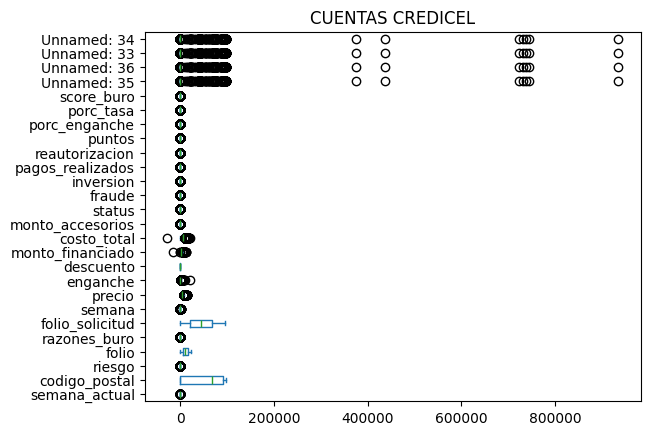

In [435]:
fig = plt.figure(figsize =(6,3))
cuanti.plot(kind='box', vert=False)
plt.title("CUENTAS CREDICEL")
plt.show() #dibujamos el diagrama

In [436]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido semana_actual           37.074954
codigo_postal       170455.331932
riesgo                  55.795398
folio                31323.107698
razones_buro             2.332011
folio_solicitud     127723.906961
semana                 541.287392
precio                8081.558082
enganche              2356.496845
descuento              478.215020
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  42.386431
porc_enganche           18.135840
porc_tasa               24.630537
score_buro              13.931194
Unnamed: 35          46353.441089
Unnamed: 36          46353.441089
Unnamed: 33          46353.441089
Unnamed: 34          46353.441089
dtype: float64
Limite inferior permitido semana_actual         -19.281318
codigo_postal   

In [437]:
df= cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df

,semana_actual,codigo_postal,riesgo,folio,razones_buro,folio_solicitud,semana,precio,enganche,descuento,...,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36,Unnamed: 33,Unnamed: 34
0,0.0,0.0,6.1,3,0.0,30,81.0,1949.0,780.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.1,4,0.0,33,225.0,2999.0,1050.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5,0.0,37,170.0,1959.0,490.0,0.0,...,0.0,0.0,14.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.1,6,0.0,38,170.0,1959.0,490.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,74.0,0.0,7,0.0,44,178.0,4299.0,1075.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,0.0,0.0,10.0,22967,0.0,96502,211.0,3349.0,297.0,0.0,...,0.0,0.0,14.1,NaN,-1.13,0.0,NaN,NaN,NaN,NaN
22731,0.0,0.0,9.0,22968,0.0,96479,200.0,4100.0,1209.0,0.0,...,0.0,0.0,14.1,NaN,7.48,0.0,37295.0,37295.0,37295.0,37295.0
22732,0.0,0.0,11.0,22969,0.0,96442,256.0,4849.0,1152.0,0.0,...,0.0,0.0,14.1,NaN,0.75,0.0,20210.0,20210.0,20210.0,20210.0
22733,0.0,0.0,14.0,22970,0.0,96536,386.0,NaN,NaN,0.0,...,0.0,0.0,14.1,NaN,-0.14,0.0,NaN,NaN,NaN,NaN


In [438]:
#Corroboramos valores nulos del dataframe4
valores_nulos=df.isnull().sum()
valores_nulos

semana_actual         78
codigo_postal          0
riesgo                66
folio                  0
razones_buro         787
folio_solicitud        0
semana               362
precio               110
enganche             292
descuento             17
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos               954
porc_enganche        486
porc_tasa            899
score_buro           582
Unnamed: 35          262
Unnamed: 36          262
Unnamed: 33          262
Unnamed: 34          262
dtype: int64

In [439]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=df.copy()
data_clean=data_clean.fillna(round(df.mean(),1))
data_clean

,semana_actual,codigo_postal,riesgo,folio,razones_buro,folio_solicitud,semana,precio,enganche,descuento,...,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36,Unnamed: 33,Unnamed: 34
0,0.0,0.0,6.1,3,0.0,30,81.0,1949.0,780.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.1,4,0.0,33,225.0,2999.0,1050.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5,0.0,37,170.0,1959.0,490.0,0.0,...,0.0,0.0,14.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.1,6,0.0,38,170.0,1959.0,490.0,0.0,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,74.0,0.0,7,0.0,44,178.0,4299.0,1075.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,0.0,0.0,10.0,22967,0.0,96502,211.0,3349.0,297.0,0.0,...,0.0,0.0,14.1,0.2,-1.13,0.0,110.3,110.3,110.3,110.3
22731,0.0,0.0,9.0,22968,0.0,96479,200.0,4100.0,1209.0,0.0,...,0.0,0.0,14.1,0.2,7.48,0.0,37295.0,37295.0,37295.0,37295.0
22732,0.0,0.0,11.0,22969,0.0,96442,256.0,4849.0,1152.0,0.0,...,0.0,0.0,14.1,0.2,0.75,0.0,20210.0,20210.0,20210.0,20210.0
22733,0.0,0.0,14.0,22970,0.0,96536,386.0,3969.2,897.6,0.0,...,0.0,0.0,14.1,0.2,-0.14,0.0,110.3,110.3,110.3,110.3


In [440]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

semana_actual       0
codigo_postal       0
riesgo              0
folio               0
razones_buro        0
folio_solicitud     0
semana              0
precio              0
enganche            0
descuento           0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
porc_enganche       0
porc_tasa           0
score_buro          0
Unnamed: 35         0
Unnamed: 36         0
Unnamed: 33         0
Unnamed: 34         0
dtype: int64

In [441]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cuali, data_clean], axis=1)
Datos_limpios

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,...,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36,Unnamed: 33,Unnamed: 34
0,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/2030 00:00,01/01/2030 00:00,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
1,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,01/01/2030 00:00,01/01/2030 00:00,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
2,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/2030 00:00,01/01/2030 00:00,...,0.0,0.0,14.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,01/01/2030 00:00,01/01/2030 00:00,...,0.0,0.0,14.1,0.9,0.00,0.0,0.0,0.0,0.0,0.0
4,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/2023 18:45,25/04/2023 00:00,...,0.0,0.0,14.1,0.2,-1.13,0.0,110.3,110.3,110.3,110.3
22731,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/2023 18:46,25/04/2023 00:00,...,0.0,0.0,14.1,0.2,7.48,0.0,37295.0,37295.0,37295.0,37295.0
22732,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,26S,NicolÃ¡s JimÃ©nez SÃ¡nchez,gph008,Sin registro,18/04/2023 18:47,25/04/2023 00:00,...,0.0,0.0,14.1,0.2,0.75,0.0,20210.0,20210.0,20210.0,20210.0
22733,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,18/04/2023 18:49,25/04/2023 00:00,...,0.0,0.0,14.1,0.2,-0.14,0.0,110.3,110.3,110.3,110.3


In [442]:
# %% 
# Seleccionar columnas numéricas para revisar outliers
numerical_cols = cuanti.select_dtypes(include=[np.number]).columns  
# Graficar diagramas de caja para cada columna numérica

